## Lead Scoring Case Study by Akansha, Hariharan & Lau

#### Problem Statement

X Education sells online courses to industry professionals. Many experts who are interested in the courses land on their website and browse for courses.The company advertised using websites and Google search engines. once the visitors land on their website and browse through the various courses and fill up the enquiry form with email and phone number. These enquries converts into leads for X Education. They also get some leads from past recommendations. Once this data is captured by sales team, they start reaching them out through emails and calls. Some leads are converted during the calls, but most are unresponsive. Through this process, the typical lead conversion rate at X education is around 30%.
Now, although X Education gets a lot of leads, its lead conversion rate is very poor.
 

#### Goal

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Importing Data dictionary file
data_dic = pd.read_excel("Leads Data Dictionary.xlsx")

In [3]:
data_dic

,Variables,Description
0,Prospect ID,A unique ID with which the customer is identif...
1,Lead Number,A lead number assigned to each lead procured.
2,Lead Origin,The origin identifier with which the customer ...
3,Lead Source,"The source of the lead. Includes Google, Organ..."
4,Do Not Email,An indicator variable selected by the customer...
5,Do Not Call,An indicator variable selected by the customer...
6,Converted,The target variable. Indicates whether a lead ...
7,TotalVisits,The total number of visits made by the custome...
8,Total Time Spent on Website,The total time spent by the customer on the we...
9,Page Views Per Visit,Average number of pages on the website viewed ...


In [4]:
## Importing all the libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [5]:
#Read the data
lead = pd.read_csv("Leads.csv")

In [6]:
#top 5 view of the data 
lead.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
#bottom 5 view of the data
lead.tail(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [8]:
#Understand the data shape & Stats

lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Insights:

1. There are four float64, three int64 and thirty object data types.
2. Total 9,240 rows and 36 columns in the dataset.
3. Null values are present in the data.
4. Target variable is "Converted".

In [9]:
#this stats includes all the numeric data types only.
lead.describe().T

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [10]:
#Treating the null values
lead.isnull().sum().sort_values()

Prospect ID                                         0
I agree to pay the amount through cheque            0
Get updates on DM Content                           0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
X Education Forums                                  0
A free copy of Mastering The Interview              0
Magazine                                            0
Search                                              0
Newspaper Article                                   0
Last Notable Activity                               0
Lead Number                                         0
Lead Origin                                         0
Total Time Spent on Website                         0
Converted                                           0
Do Not Call                 

### Insights: 
From the above output, we can infer that many columns have more than 3000. So, will drop these null values.

In [11]:
## dropping the null values which have more 3000 null values.

for x in lead.columns:
    if lead[x].isnull().sum()>3000:
        print(x , "null values: " , lead[x].isnull().sum())
        lead.drop(x , 1 , inplace=True)
        print("Done", x)

Tags null values:  3353
Done Tags
Lead Quality null values:  4767
Done Lead Quality
Asymmetrique Activity Index null values:  4218
Done Asymmetrique Activity Index
Asymmetrique Profile Index null values:  4218
Done Asymmetrique Profile Index
Asymmetrique Activity Score null values:  4218
Done Asymmetrique Activity Score
Asymmetrique Profile Score null values:  4218
Done Asymmetrique Profile Score


In [12]:
lead.isnull().sum().sort_values(ascending = False)

What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Get updates on DM Content                           0
Newspaper                                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Update me on Supply Chain Content                   0
Receive More Updates About Our Courses              0
Through Recommendations                             0
Digital Advertisement       

In [13]:
#variables having more than 2000 null values in 5 columns, let's obtain the unique value counts for all columns.
lead.nunique().sort_values(ascending = False)

Prospect ID                                      9240
Lead Number                                      9240
Total Time Spent on Website                      1731
Page Views Per Visit                              114
TotalVisits                                        41
Country                                            38
Lead Source                                        21
Specialization                                     19
Last Activity                                      17
Last Notable Activity                              16
How did you hear about X Education                 10
City                                                7
What is your current occupation                     6
Lead Profile                                        6
Lead Origin                                         5
What matters most to you in choosing a course       3
Do Not Call                                         2
A free copy of Mastering The Interview              2
Through Recommendations     

In [14]:
# Checking the columns which are not important for our analysis
print(lead["Country"].value_counts().sort_values(ascending = False))
print('\n ------------------ \n')
print(lead["City"].value_counts().sort_values(ascending = False))
print('\n ------------------ \n')
print(lead["Lead Number"].value_counts)
print('\n ------------------ \n')
print(lead["Prospect ID"].value_counts)
print('\n ------------------ \n')

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
Belgium                    2
Philippines                2
Ghana                      2
Netherlands                2
China                      2
Italy                      2
Bangladesh                 2
Uganda                     2
Asia/Pacific Region        2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

Insights : From the above output, we can infer that Country, City, Lead number and Prospect ID have all unique values. which is not useful for the data. so, we can drop these variables.

In [15]:
lead.drop(["Country" , "City", "Lead Number" , "Prospect ID"] , axis= 1 , inplace = True)

In [16]:
#Let's have a loook at the data shape now.
lead.shape

(9240, 27)

In [17]:
#checking null values again
lead.isnull().sum().sort_values(ascending = False)

Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
How did you hear about X Education               2207
Specialization                                   1438
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Origin                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Search                                              0
Newspaper                   

In [18]:
# Checking the value counts of all the columns

for c in lead:
    print(lead[c].astype('category').value_counts())
    print('\n ***************************** \n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

 ***************************** 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

 ***************************** 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

 ***************************** 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

 *************

In [19]:
lead.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [20]:
# Let’s check the "What matters most to you in choosing a course" value counts.
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [21]:
lead.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [22]:
lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [23]:
lead= lead[~pd.isnull(lead['What is your current occupation'])]
lead= lead[~pd.isnull(lead['Specialization'])]
lead= lead[~pd.isnull(lead['Lead Source'])]
lead= lead[~pd.isnull(lead['TotalVisits'])]

In [24]:
lead.isnull().sum().sort_values()

Lead Origin                                 0
I agree to pay the amount through cheque    0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
X Education Forums                          0
Newspaper Article                           0
Magazine                                    0
Search                                      0
What is your current occupation             0
Specialization                              0
Last Activity                               0
Page Views Per Visit                        0
Total Time Spent on Website                 0
TotalVisits                                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                                0
Lead Source                       

In [25]:
lead.skew()

Converted                       0.076333
TotalVisits                    21.613825
Total Time Spent on Website     0.796676
Page Views Per Visit            3.320001
dtype: float64

In [26]:
for x in lead:
    print(lead[x].astype('category').value_counts())
    print('\n -------------------- \n')

Landing Page Submission    3625
API                        2140
Lead Add Form               581
Lead Import                  27
Name: Lead Origin, dtype: int64

 -------------------- 

Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Social Media            2
Pay per Click Ads       1
Press_Release           1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

 -------------------- 

No     5938
Yes     435
Name: Do Not Email, dtype: int64

 -------------------- 

No     6371
Yes       2
Name: Do Not Call, dtype: int64

 -------------------- 

0    3308
1    3065
Name: Converted, dtype: int64

 -------------------- 

0.0      1347
2.0      1225
3.0       937
4.0       823
5.0       578
6.0       337
1.0       260
7.0   

In [27]:
lead = lead.drop(['Do Not Call', 'Search', 'Magazine','Newspaper Article', 'X Education Forums','Newspaper',
                  'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content','Get updates on DM Content', 
                  'I agree to pay the amount through cheque'], axis=1)

In [28]:
#Lets recheck the dataset as it is fully cleaned now. 

print(lead.shape)
print('\n ------------- \n')
print(lead.info())
print('\n ------------- \n')
print(lead.describe())

(6373, 12)

 ------------- 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6373 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             6373 non-null   object 
 1   Lead Source                             6373 non-null   object 
 2   Do Not Email                            6373 non-null   object 
 3   Converted                               6373 non-null   int64  
 4   TotalVisits                             6373 non-null   float64
 5   Total Time Spent on Website             6373 non-null   int64  
 6   Page Views Per Visit                    6373 non-null   float64
 7   Last Activity                           6373 non-null   object 
 8   Specialization                          6373 non-null   object 
 9   What is your current occupation         6373 non-null   object 
 10  A free copy of Mastering The In

In [29]:
# Converting yes and no values into binary form 1 and 0 
print(lead["Do Not Email"].value_counts())
print(lead["A free copy of Mastering The Interview"].value_counts())
print('\n ------------- \n')
# Replacing the values of yes =1 and No= 0
lead["Do Not Email"].replace(to_replace = "No" , value = 0 , inplace = True)
lead["Do Not Email"].replace(to_replace = "Yes" , value = 1 , inplace = True)
lead["A free copy of Mastering The Interview"].replace(to_replace = "No" , value = 0 , inplace = True)
lead["A free copy of Mastering The Interview"].replace(to_replace = "Yes" , value = 1 , inplace = True)
print('\n ------------- \n')
print(lead["Do Not Email"].value_counts())
print(lead["A free copy of Mastering The Interview"].value_counts())

No     5938
Yes     435
Name: Do Not Email, dtype: int64
No     4202
Yes    2171
Name: A free copy of Mastering The Interview, dtype: int64

 ------------- 


 ------------- 

0    5938
1     435
Name: Do Not Email, dtype: int64
0    4202
1    2171
Name: A free copy of Mastering The Interview, dtype: int64


In [30]:
# Checking the data at 25%,50%,75%,90%,95% and above
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000,6373.000000
mean,0.068257,0.480935,3.624196,535.224541,2.480464,0.340656
std,0.252206,0.499676,5.048555,565.374753,2.167364,0.473967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,34.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,287.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,1022.000000,3.500000,1.000000
90%,0.000000,1.000000,8.000000,1428.800000,5.000000,1.000000
95%,1.000000,1.000000,10.000000,1592.400000,6.000000,1.000000
99%,1.000000,1.000000,18.000000,1849.280000,9.000000,1.000000


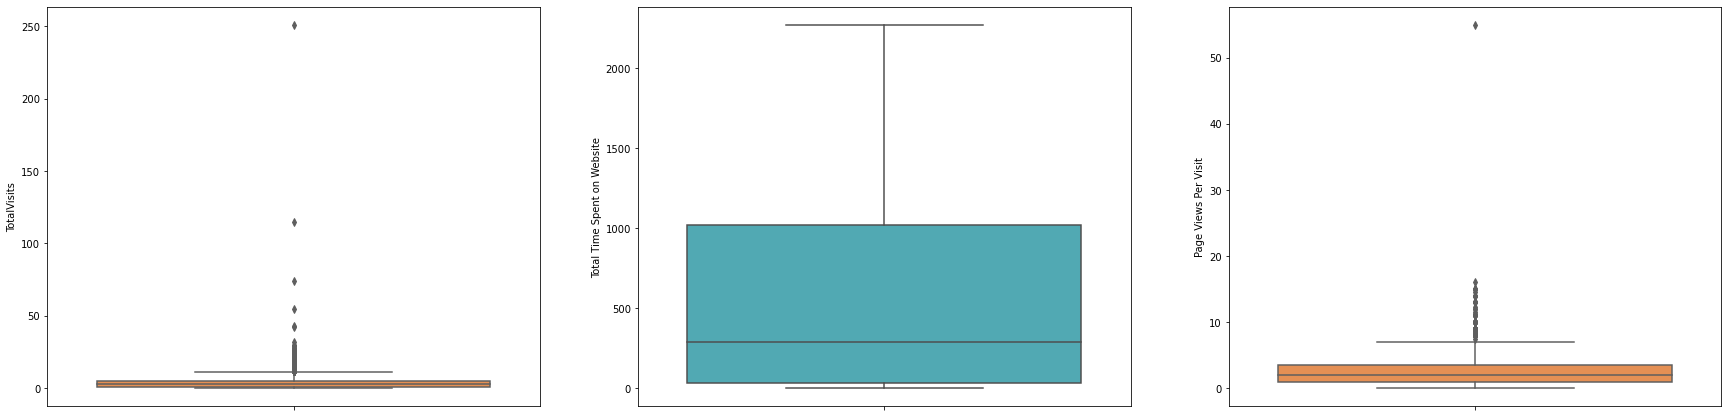

In [31]:
#checking outliers 
plt.figure(figsize=(30, 25))
plt.subplot(3,3,1)
sns.boxplot(y = 'TotalVisits', data = lead, palette = "YlOrRd")
plt.subplot(3,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = lead, palette = "YlGnBu")
plt.subplot(3,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = lead, palette = "YlOrRd")
plt.show()

In [32]:
# Removing values beyond 99% for Total Visits

total_visits = lead['TotalVisits'].quantile(0.99)
lead = lead[lead["TotalVisits"] < total_visits]
lead["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6308.000000
mean        3.363824
std         3.007681
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        14.000000
max        17.000000
Name: TotalVisits, dtype: float64

In [33]:
# Removing values beyond 99% for page Views Per Visit

page_visits = lead['Page Views Per Visit'].quantile(0.99)
lead = lead[lead["Page Views Per Visit"] < page_visits]
lead["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    6226.000000
mean        2.347920
std         1.828861
min         0.000000
25%         1.000000
50%         2.000000
75%         3.250000
90%         5.000000
95%         6.000000
99%         7.000000
max         8.500000
Name: Page Views Per Visit, dtype: float64

In [34]:
# Let’s check data again
lead.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview
count,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000,6226.000000
mean,0.066817,0.480726,3.270800,530.808063,2.347920,0.334083
std,0.249724,0.499669,2.907667,565.111571,1.828861,0.471707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,30.000000,1.000000,0.000000
50%,0.000000,0.000000,3.000000,281.000000,2.000000,0.000000
75%,0.000000,1.000000,5.000000,1020.000000,3.250000,1.000000
90%,0.000000,1.000000,7.000000,1421.000000,5.000000,1.000000
95%,1.000000,1.000000,9.000000,1590.750000,6.000000,1.000000
99%,1.000000,1.000000,13.000000,1848.500000,7.000000,1.000000


In [35]:
# Finding the percentage of data retained

lead_percent = round(100*(len(lead)/9240))
print(lead_percent)

67


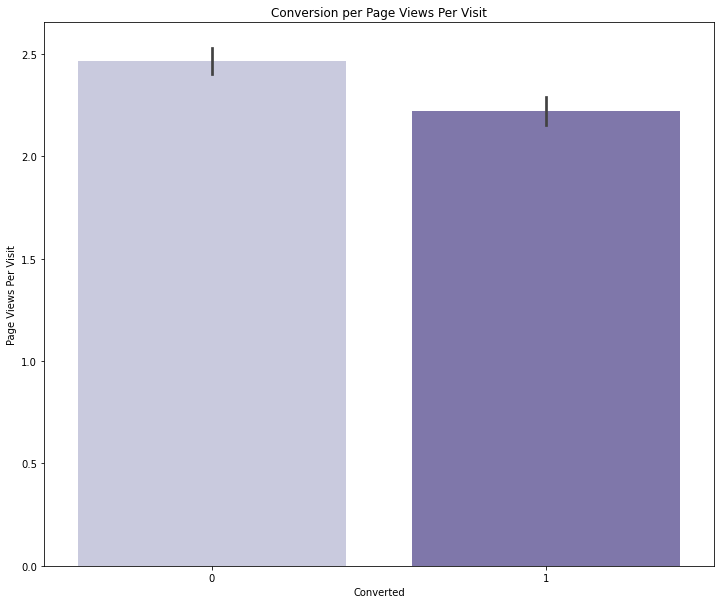

In [36]:
#Univariate Analysis
plt.figure(figsize=(12,10))
plt.title("Conversion per Page Views Per Visit")
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = lead, palette= "Purples")
plt.show()

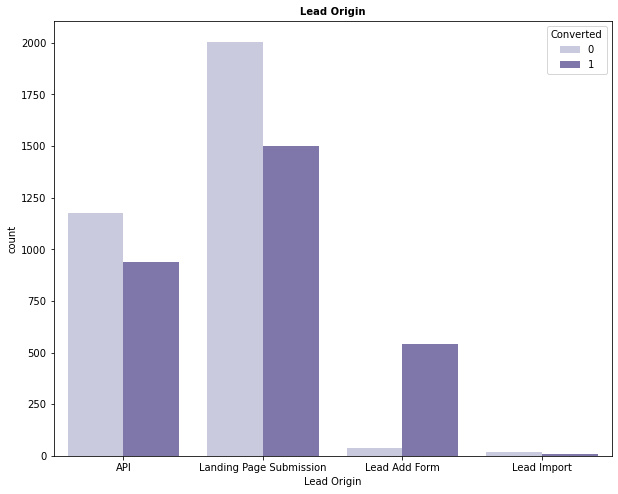

In [37]:
#Univariate Analysis - Categorical Variables
#Target variable - Converted
plt.figure(figsize = (10,8))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['Lead Origin'], hue = lead.Converted, palette = "Purples")
plt.title('Lead Origin', fontsize = 10, fontweight = 'bold')
plt.show()

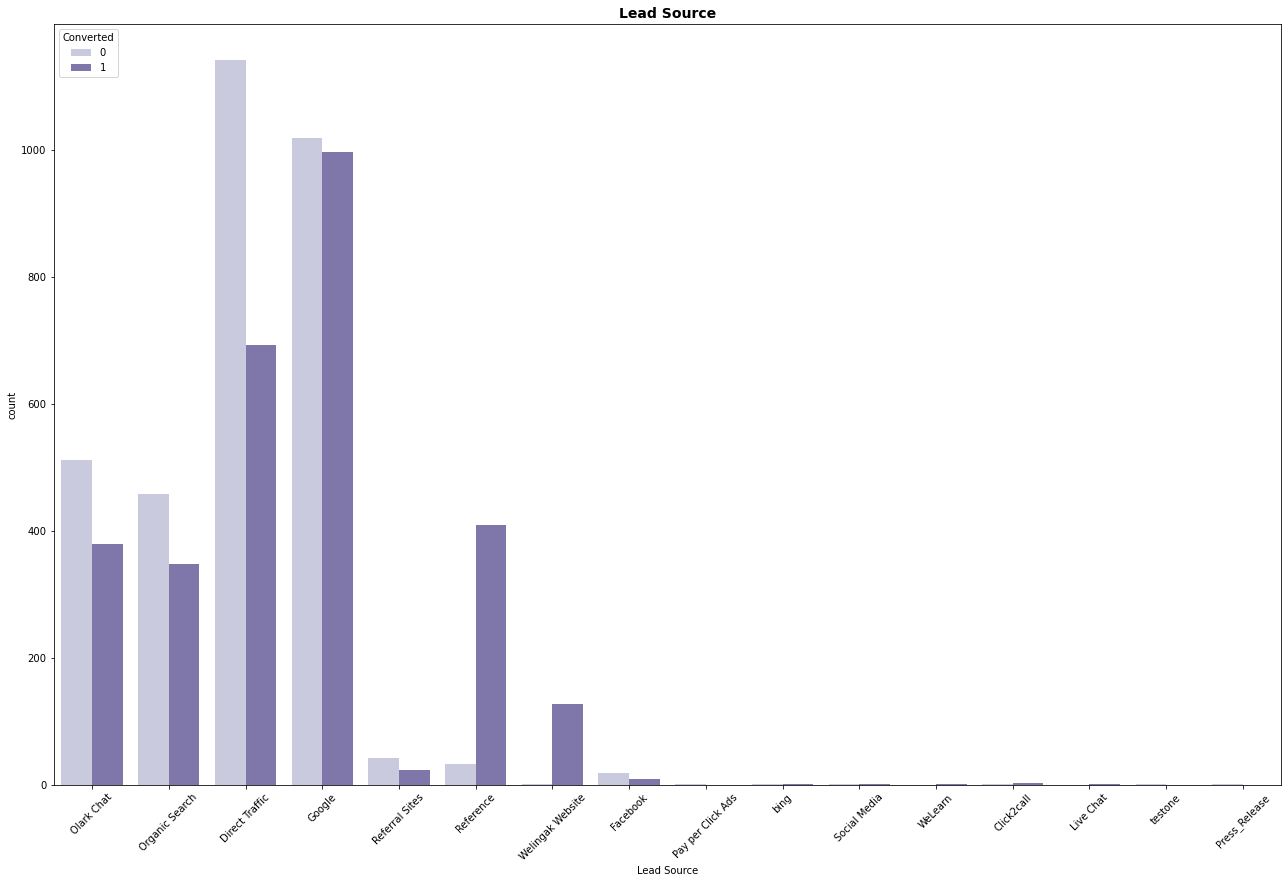

In [38]:
plt.figure(figsize = (22,14))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['Lead Source'], hue = lead.Converted, palette = "Purples")
plt.title('Lead Source', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

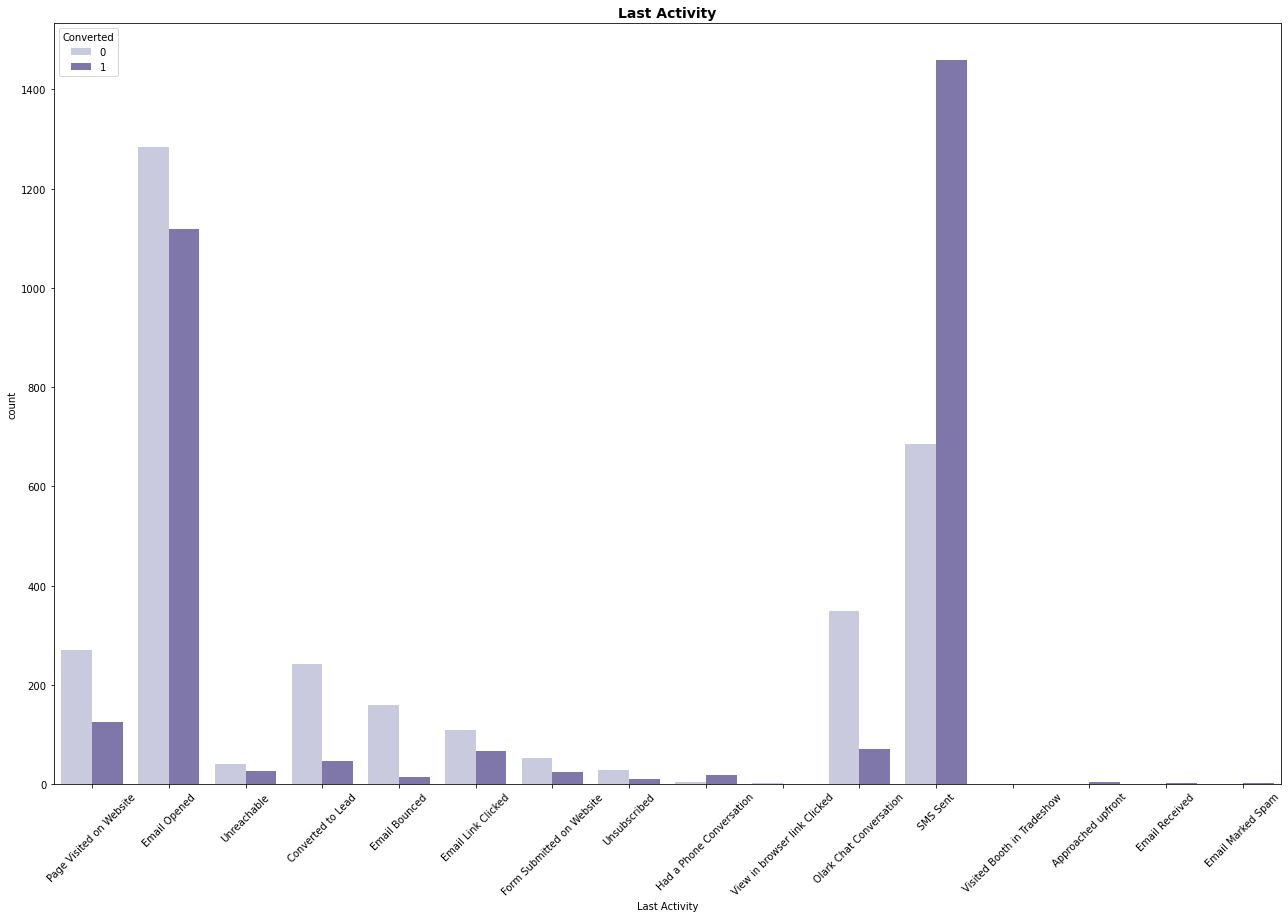

In [39]:
plt.figure(figsize = (22,14))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['Last Activity'], hue = lead.Converted, palette = "Purples")
plt.title('Last Activity', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

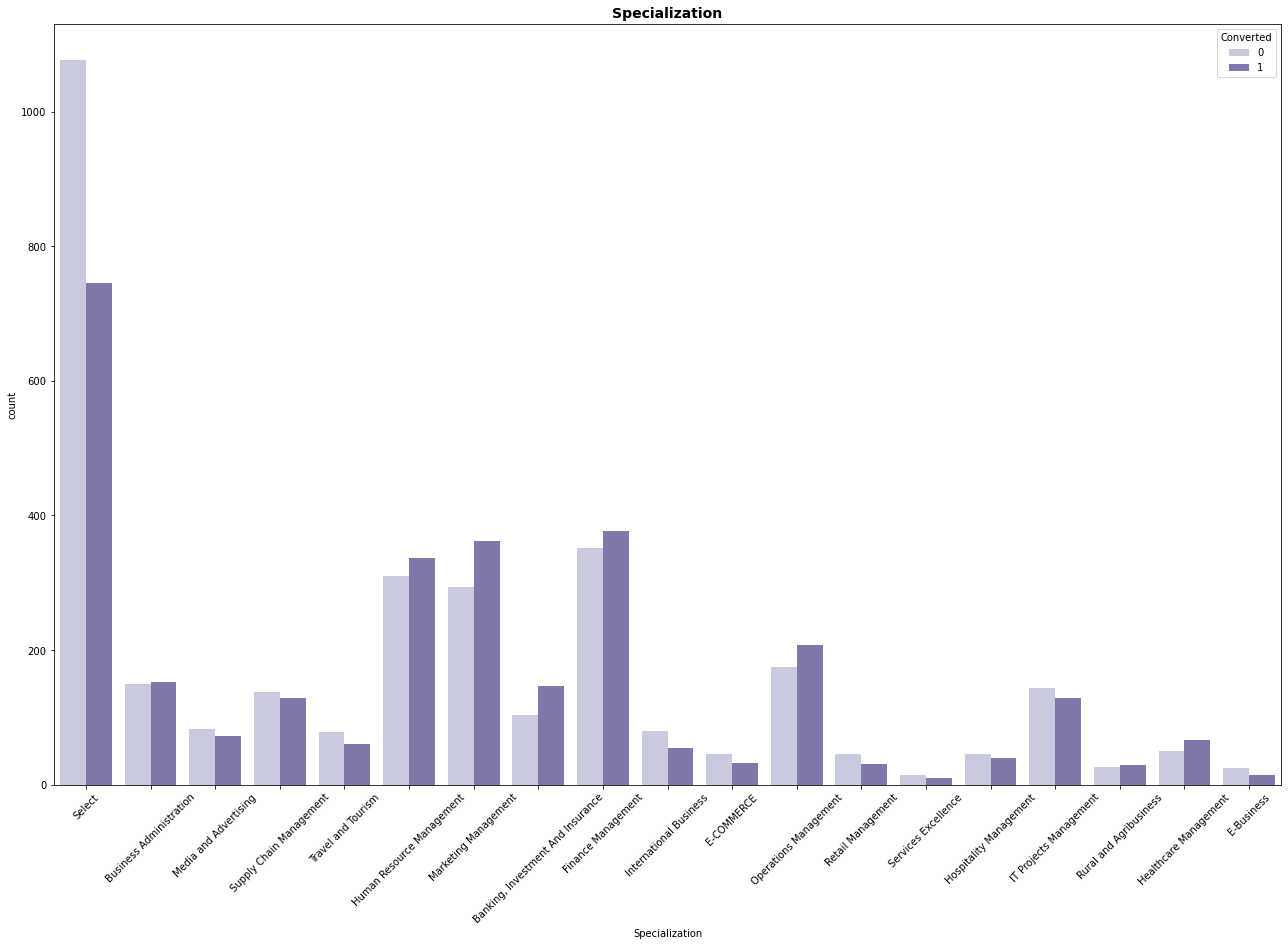

In [40]:
plt.figure(figsize = (22,14))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['Specialization'], hue = lead.Converted, palette = "Purples")
plt.title('Specialization', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

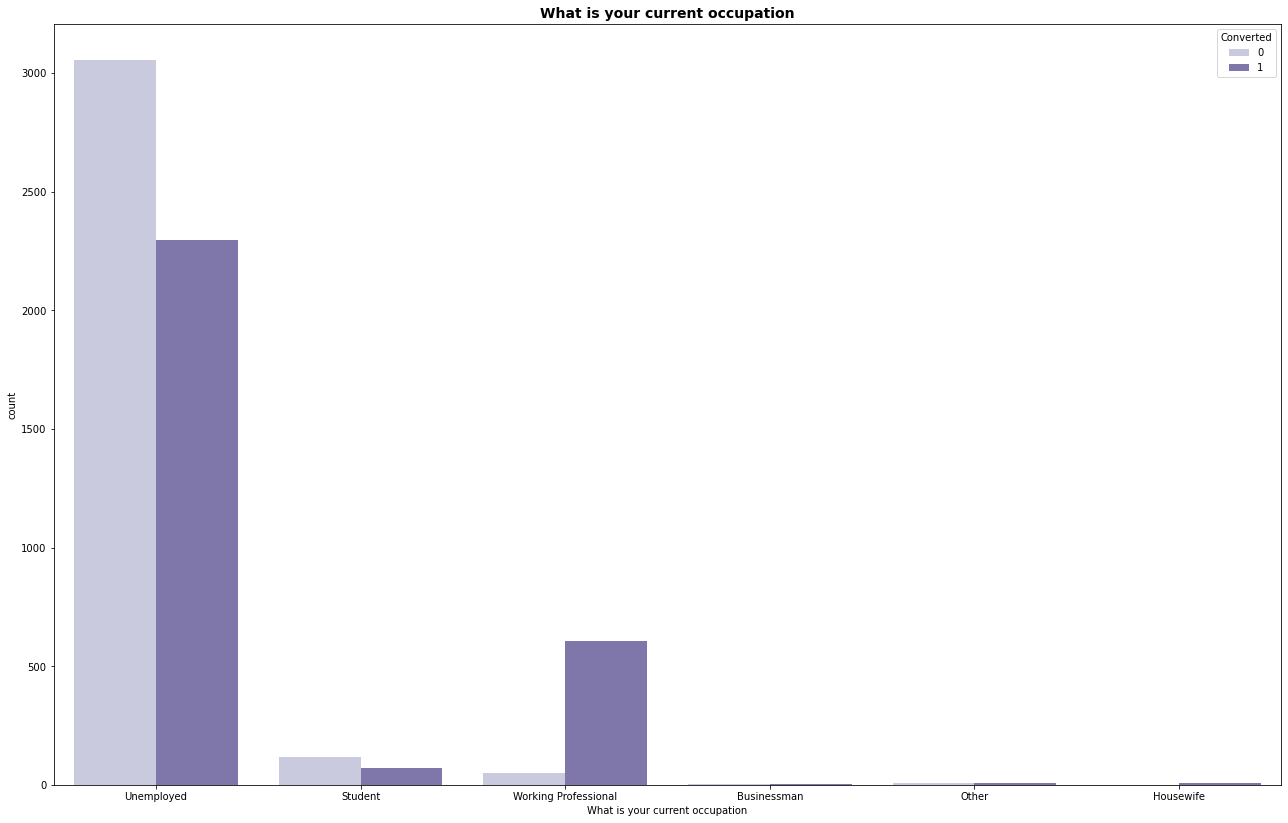

In [41]:
plt.figure(figsize = (22,14))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['What is your current occupation'], hue = lead.Converted, palette = "Purples")
plt.title('What is your current occupation', fontsize = 14, fontweight = 'bold')
plt.show()

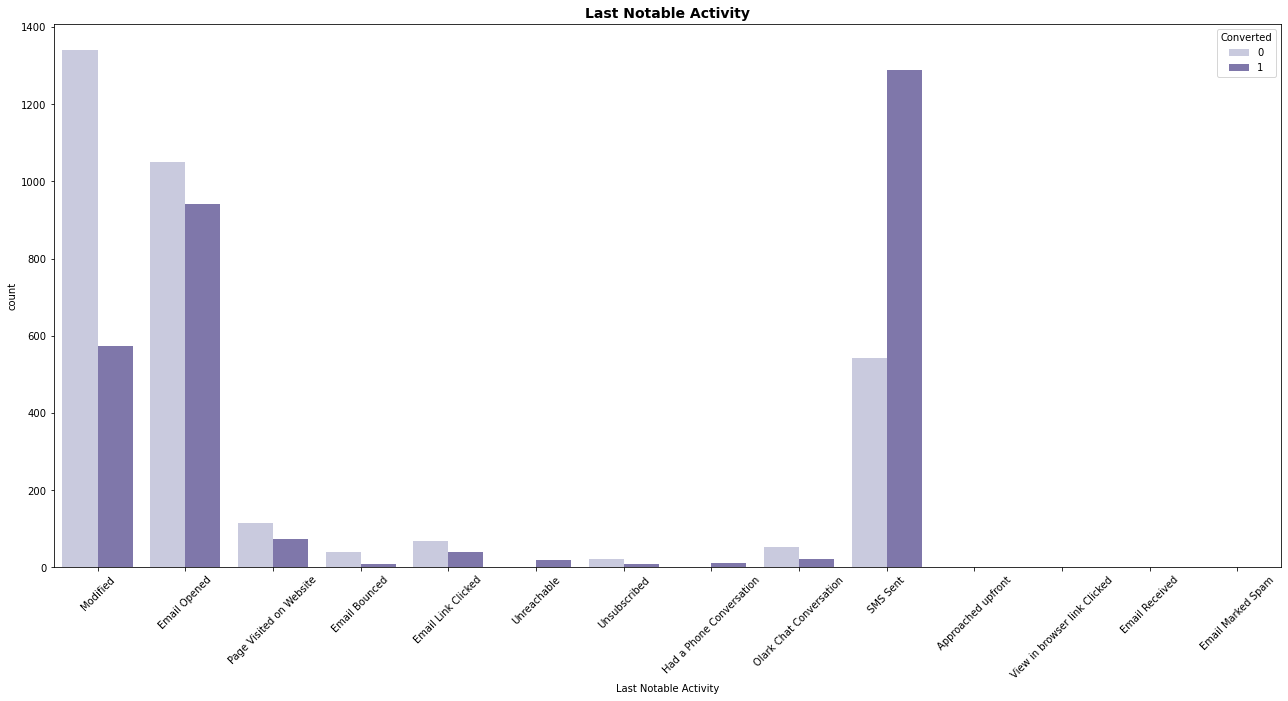

In [42]:
plt.figure(figsize = (22,10))
plt.subplots_adjust(hspace=0.2)
sns.countplot(lead['Last Notable Activity'], hue = lead.Converted, palette = "Purples")
plt.title('Last Notable Activity', fontsize = 14, fontweight = 'bold')
plt.xticks(rotation = 45)
plt.show()

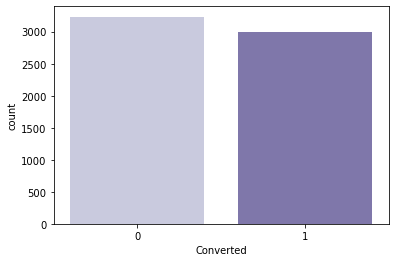

----------------------------------------------------


0    51.927401
1    48.072599
Name: Converted, dtype: float64

In [43]:
sns.countplot(lead['Converted'], palette = 'Purples')
plt.show()
print('----------------------------------------------------')
lead['Converted'].value_counts(normalize=True)*100

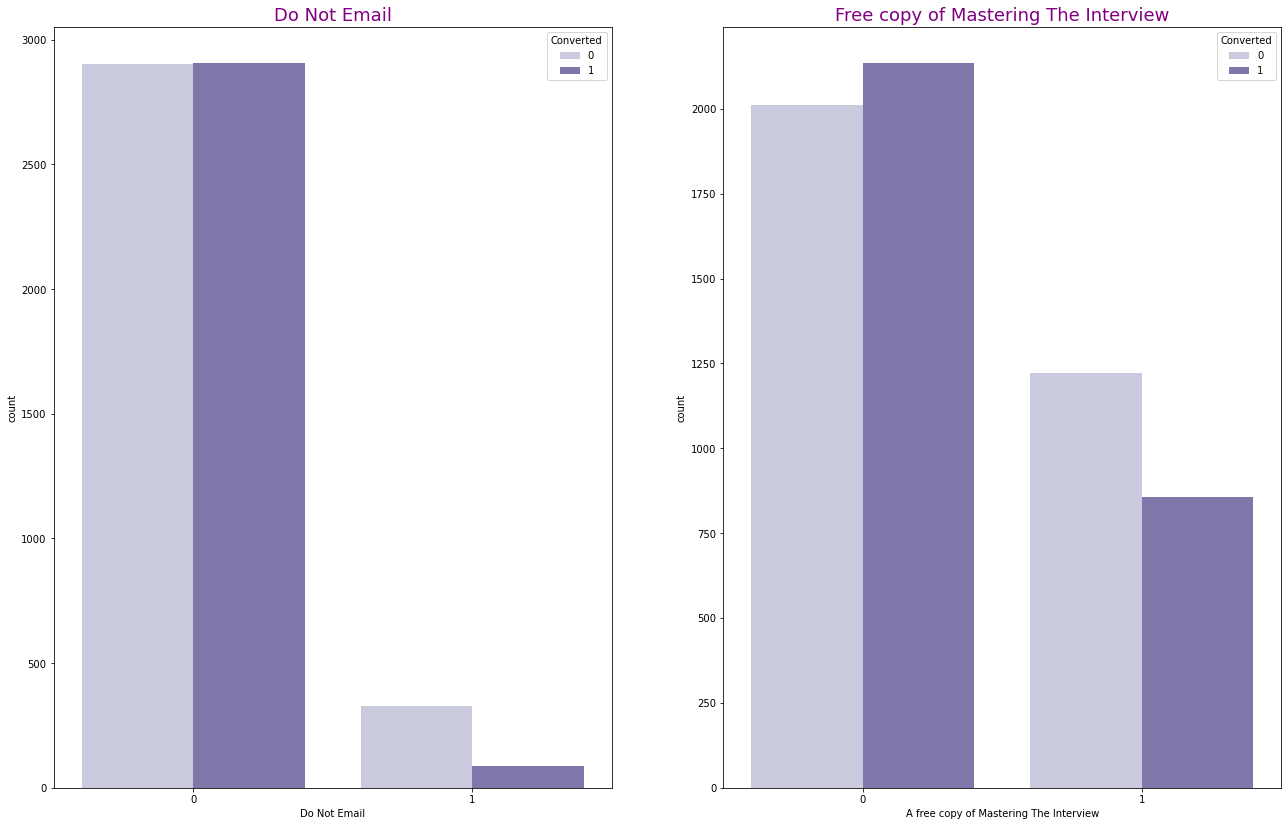

In [44]:
## Bivariate Analysis
plt.figure(figsize=(22,14))

plt.subplot(1,2,1)
s1 = sns.countplot(lead['Do Not Email'], hue=lead.Converted, palette = "Purples" )
plt.title("Do Not Email", fontdict={'fontsize': 18, 'color' : 'Purple'})

plt.subplot(1,2,2)
s2 = sns.countplot(lead['A free copy of Mastering The Interview'], hue=lead.Converted,  palette = "Purples")
plt.title("Free copy of Mastering The Interview", fontdict={'fontsize': 18, 'color' : 'Purple'})

plt.show()

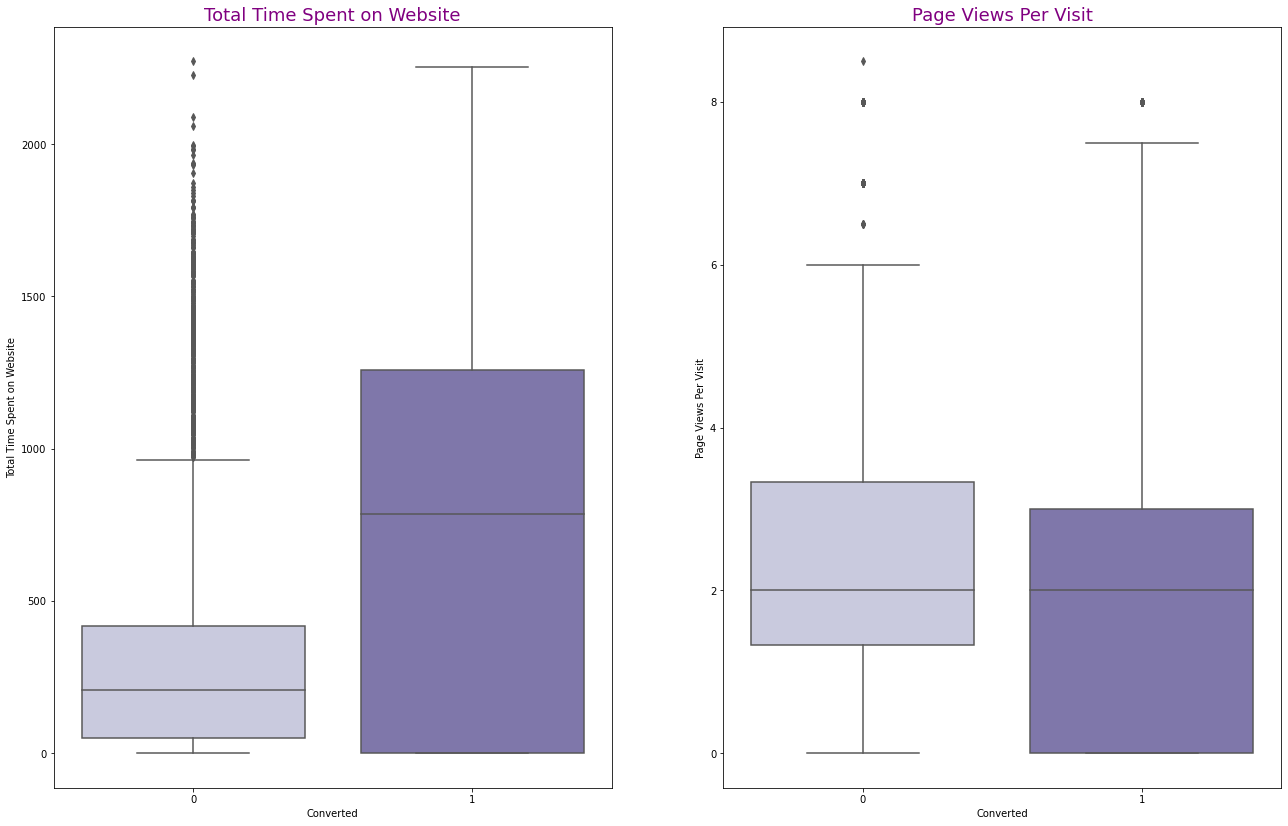

In [45]:
plt.figure(figsize=(22,14))

plt.subplot(1,2,1)
sns.boxplot(lead["Converted"] , lead["Total Time Spent on Website"] , palette = "Purples")
plt.title("Total Time Spent on Website", fontdict={'fontsize': 18, 'color' : 'Purple'})

plt.subplot(1,2,2)
sns.boxplot(lead["Converted"] , lead["Page Views Per Visit"] , palette = "Purples")
plt.title("Page Views Per Visit", fontdict={'fontsize': 18, 'color' : 'Purple'})

plt.show()

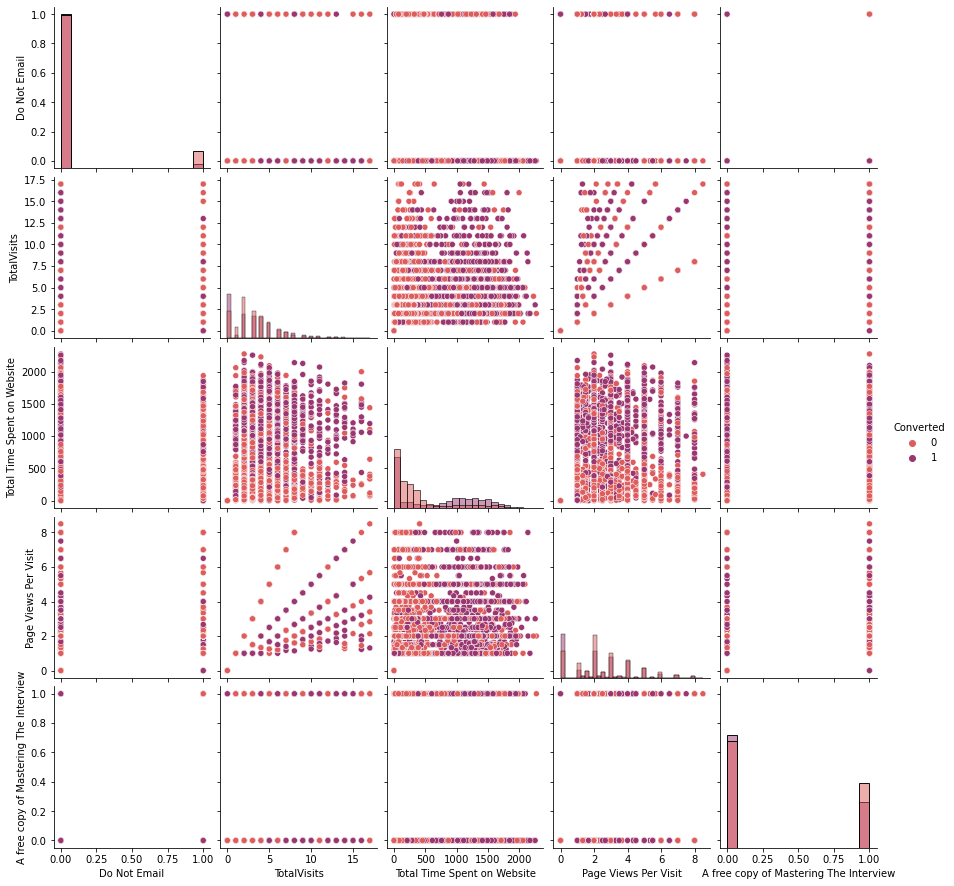

In [46]:
#Pairplot  #Multivariate analysis
sns.pairplot(lead,diag_kind='hist',hue='Converted' , palette = "flare" )
plt.grid()
plt.show()

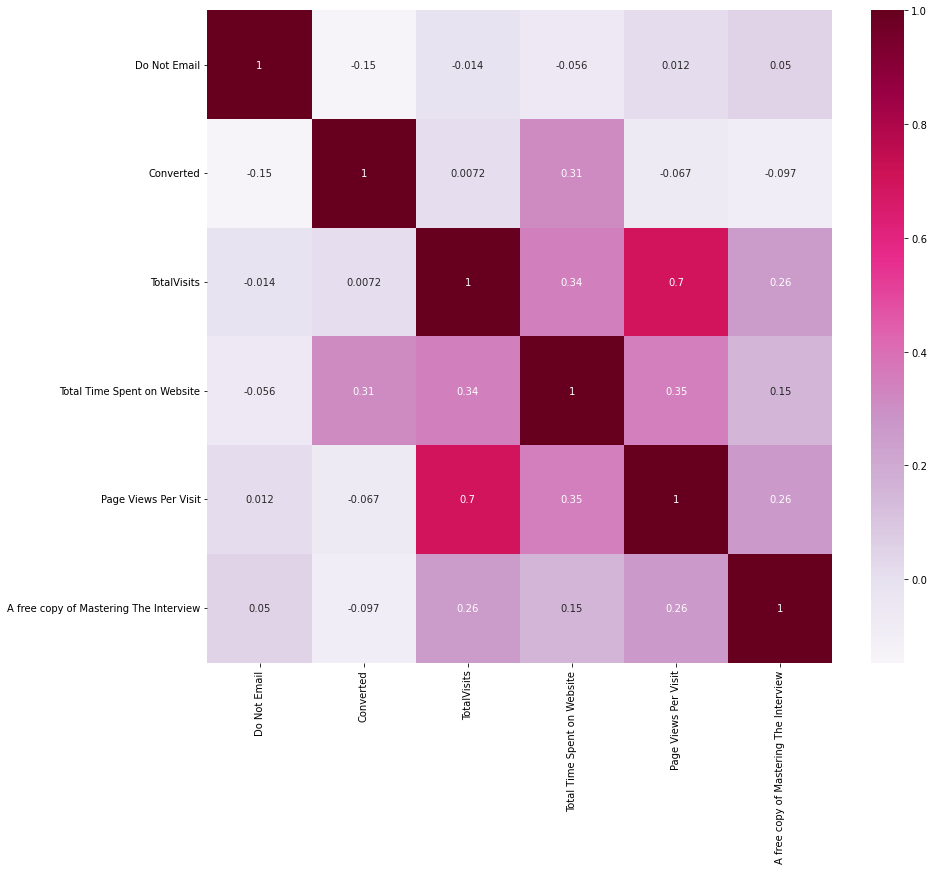

In [47]:
#let's have a look at heatmap to find the correlation.
plt.figure(figsize=(14,12))

sns.heatmap(lead.corr(), cmap="PuRd", annot=True)
plt.show()

In [48]:
# Creating dummies for the following columns:

# Lead Origin : 

dummy_lead_origin = pd.get_dummies(lead['Lead Origin'], prefix='LeadOrigin')
# Dropping Lead Import column
new_lead_origin = dummy_lead_origin.drop(['LeadOrigin_Lead Import'], 1)
#Adding the results to the original dataframe
lead = pd.concat([lead, new_lead_origin], axis = 1)

# Lead Source :

dummy_lead_source = pd.get_dummies(lead['Lead Source'], prefix='LeadSource')
# Dropping Pay per Click Ads column
new_lead_source = dummy_lead_source.drop(['LeadSource_Pay per Click Ads'], 1)
# Adding the results to the original dataframe
lead = pd.concat([lead,new_lead_source], axis=1)

# last Activity

dummy_last_activity = pd.get_dummies(lead['Last Activity'], prefix='LastActivity')
# Dropping Email Marked Spam column
new_last_activity = dummy_last_activity.drop(['LastActivity_Email Marked Spam'], 1)
# Adding the results to the original dataframe
lead = pd.concat([lead,new_last_activity], axis=1)

# What is your current occupation

dummy_current_occupation = pd.get_dummies(lead['What is your current occupation'], prefix='CurrentOccupation')
# Dropping Housewife column
new_current_occupation = dummy_current_occupation.drop(['CurrentOccupation_Housewife'], 1)
# Adding the results to the original dataframe
lead = pd.concat([lead,new_current_occupation], axis=1)

# Last Notable Activity

dummy_last_notable_activity = pd.get_dummies(lead['Last Notable Activity'], prefix='LastNotableActivity')
# Dropping Approached upfront column
new_last_notable_activity = dummy_last_notable_activity.drop(['LastNotableActivity_Approached upfront'], 1)
# Adding the results to the original dataframe
lead = pd.concat([lead,new_last_notable_activity], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,LastNotableActivity_Email Opened,LastNotableActivity_Email Received,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [49]:
# Creating dummy varibale for specialization and Dropping  "Select columns" from specialization
lead_specialization = pd.get_dummies(lead['Specialization'], prefix = 'Specialization')
lead_specialization = lead_specialization.drop(['Specialization_Select'], 1)
lead = pd.concat([lead, lead_specialization], axis = 1)

In [50]:
# After creating dummy varaibles for the following columns now we are removing  all the duplicates columns: 
lead_columns = lead.drop(['Lead Origin', 'Lead Source', 'Last Activity','Specialization',
           'What is your current occupation', 'Last Notable Activity'], 
           axis=1, inplace = True)
lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0.0,0,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#Splitting the Data into Training and Testing Sets
# Putting feature variable to X
X = lead.drop(['Converted'], axis = 1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,LeadSource_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Y = lead['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [53]:
# Splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [54]:
X_train.shape, Y_train.shape

((4358, 74), (4358,))

In [55]:
X_test.shape, Y_test.shape

((1868, 74), (1868,))

In [56]:
## Feature Scaling using Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website',
                                                                                                              'Page Views Per Visit']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,LeadSource_Direct Traffic,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4305,0,0.352941,0.164173,0.705882,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2675,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7045,0,0.000000,0.000000,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2027,0,0.294118,0.453345,0.588235,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1410,0,0.294118,0.129401,0.588235,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
# Checking the Conversion Rate
converted = (sum(lead['Converted'])/len(lead['Converted'].index))*100
converted

48.07259877931256

In [58]:
## Looking at Correlations
lead.corr()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Click2call,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
Do Not Email,1.000000,-0.146742,-0.014304,-0.056182,0.012443,0.050487,-0.064013,0.078688,-0.026011,-0.006785,...,0.046656,0.013851,-0.026761,0.015041,-0.009613,0.017116,0.015983,0.045635,-0.005437,0.046640
Converted,-0.146742,1.000000,0.007242,0.310474,-0.067021,-0.096721,-0.051804,-0.119200,0.292191,0.013665,...,-0.004337,-0.022093,0.049376,-0.005184,0.031953,-0.016205,0.008795,-0.007976,0.000968,-0.012666
TotalVisits,-0.014304,0.007242,1.000000,0.344701,0.698838,0.259632,-0.214807,0.408697,-0.332249,0.008539,...,0.040633,0.049664,0.018118,0.058158,0.031334,0.023856,0.045522,0.028974,0.049871,0.099224
Total Time Spent on Website,-0.056182,0.310474,0.344701,1.000000,0.346489,0.153939,-0.129252,0.278258,-0.250348,-0.000979,...,0.026372,0.011749,0.052818,0.039170,0.051450,0.024940,0.019898,0.003053,0.045601,0.036541
Page Views Per Visit,0.012443,-0.067021,0.698838,0.346489,1.000000,0.262257,-0.297234,0.519938,-0.386333,-0.015223,...,0.055778,0.071161,0.034473,0.070601,0.039338,0.030625,0.032321,0.012487,0.056126,0.109374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Specialization_Retail Management,0.017116,-0.016205,0.023856,0.024940,0.030625,0.032902,-0.058023,0.071341,-0.025565,-0.002819,...,-0.023760,-0.016424,-0.038117,-0.017763,-0.028461,1.000000,-0.010495,-0.006915,-0.023439,-0.016799
Specialization_Rural and Agribusiness,0.015983,0.008795,0.045522,0.019898,0.032321,0.053225,-0.038638,0.048519,-0.018447,-0.002394,...,-0.020178,-0.013948,-0.032371,-0.015085,-0.024170,-0.010495,1.000000,-0.005873,-0.019905,-0.014266
Specialization_Services Excellence,0.045635,-0.007976,0.028974,0.003053,0.012487,0.038368,-0.033622,0.039096,-0.011020,-0.001577,...,-0.013296,-0.009191,-0.021330,-0.009940,-0.015927,-0.006915,-0.005873,1.000000,-0.013116,-0.009400
Specialization_Supply Chain Management,-0.005437,0.000968,0.049871,0.045601,0.056126,0.105375,-0.097293,0.113464,-0.034729,-0.005346,...,-0.045065,-0.031151,-0.072297,-0.033690,-0.053981,-0.023439,-0.019905,-0.013116,1.000000,-0.031862


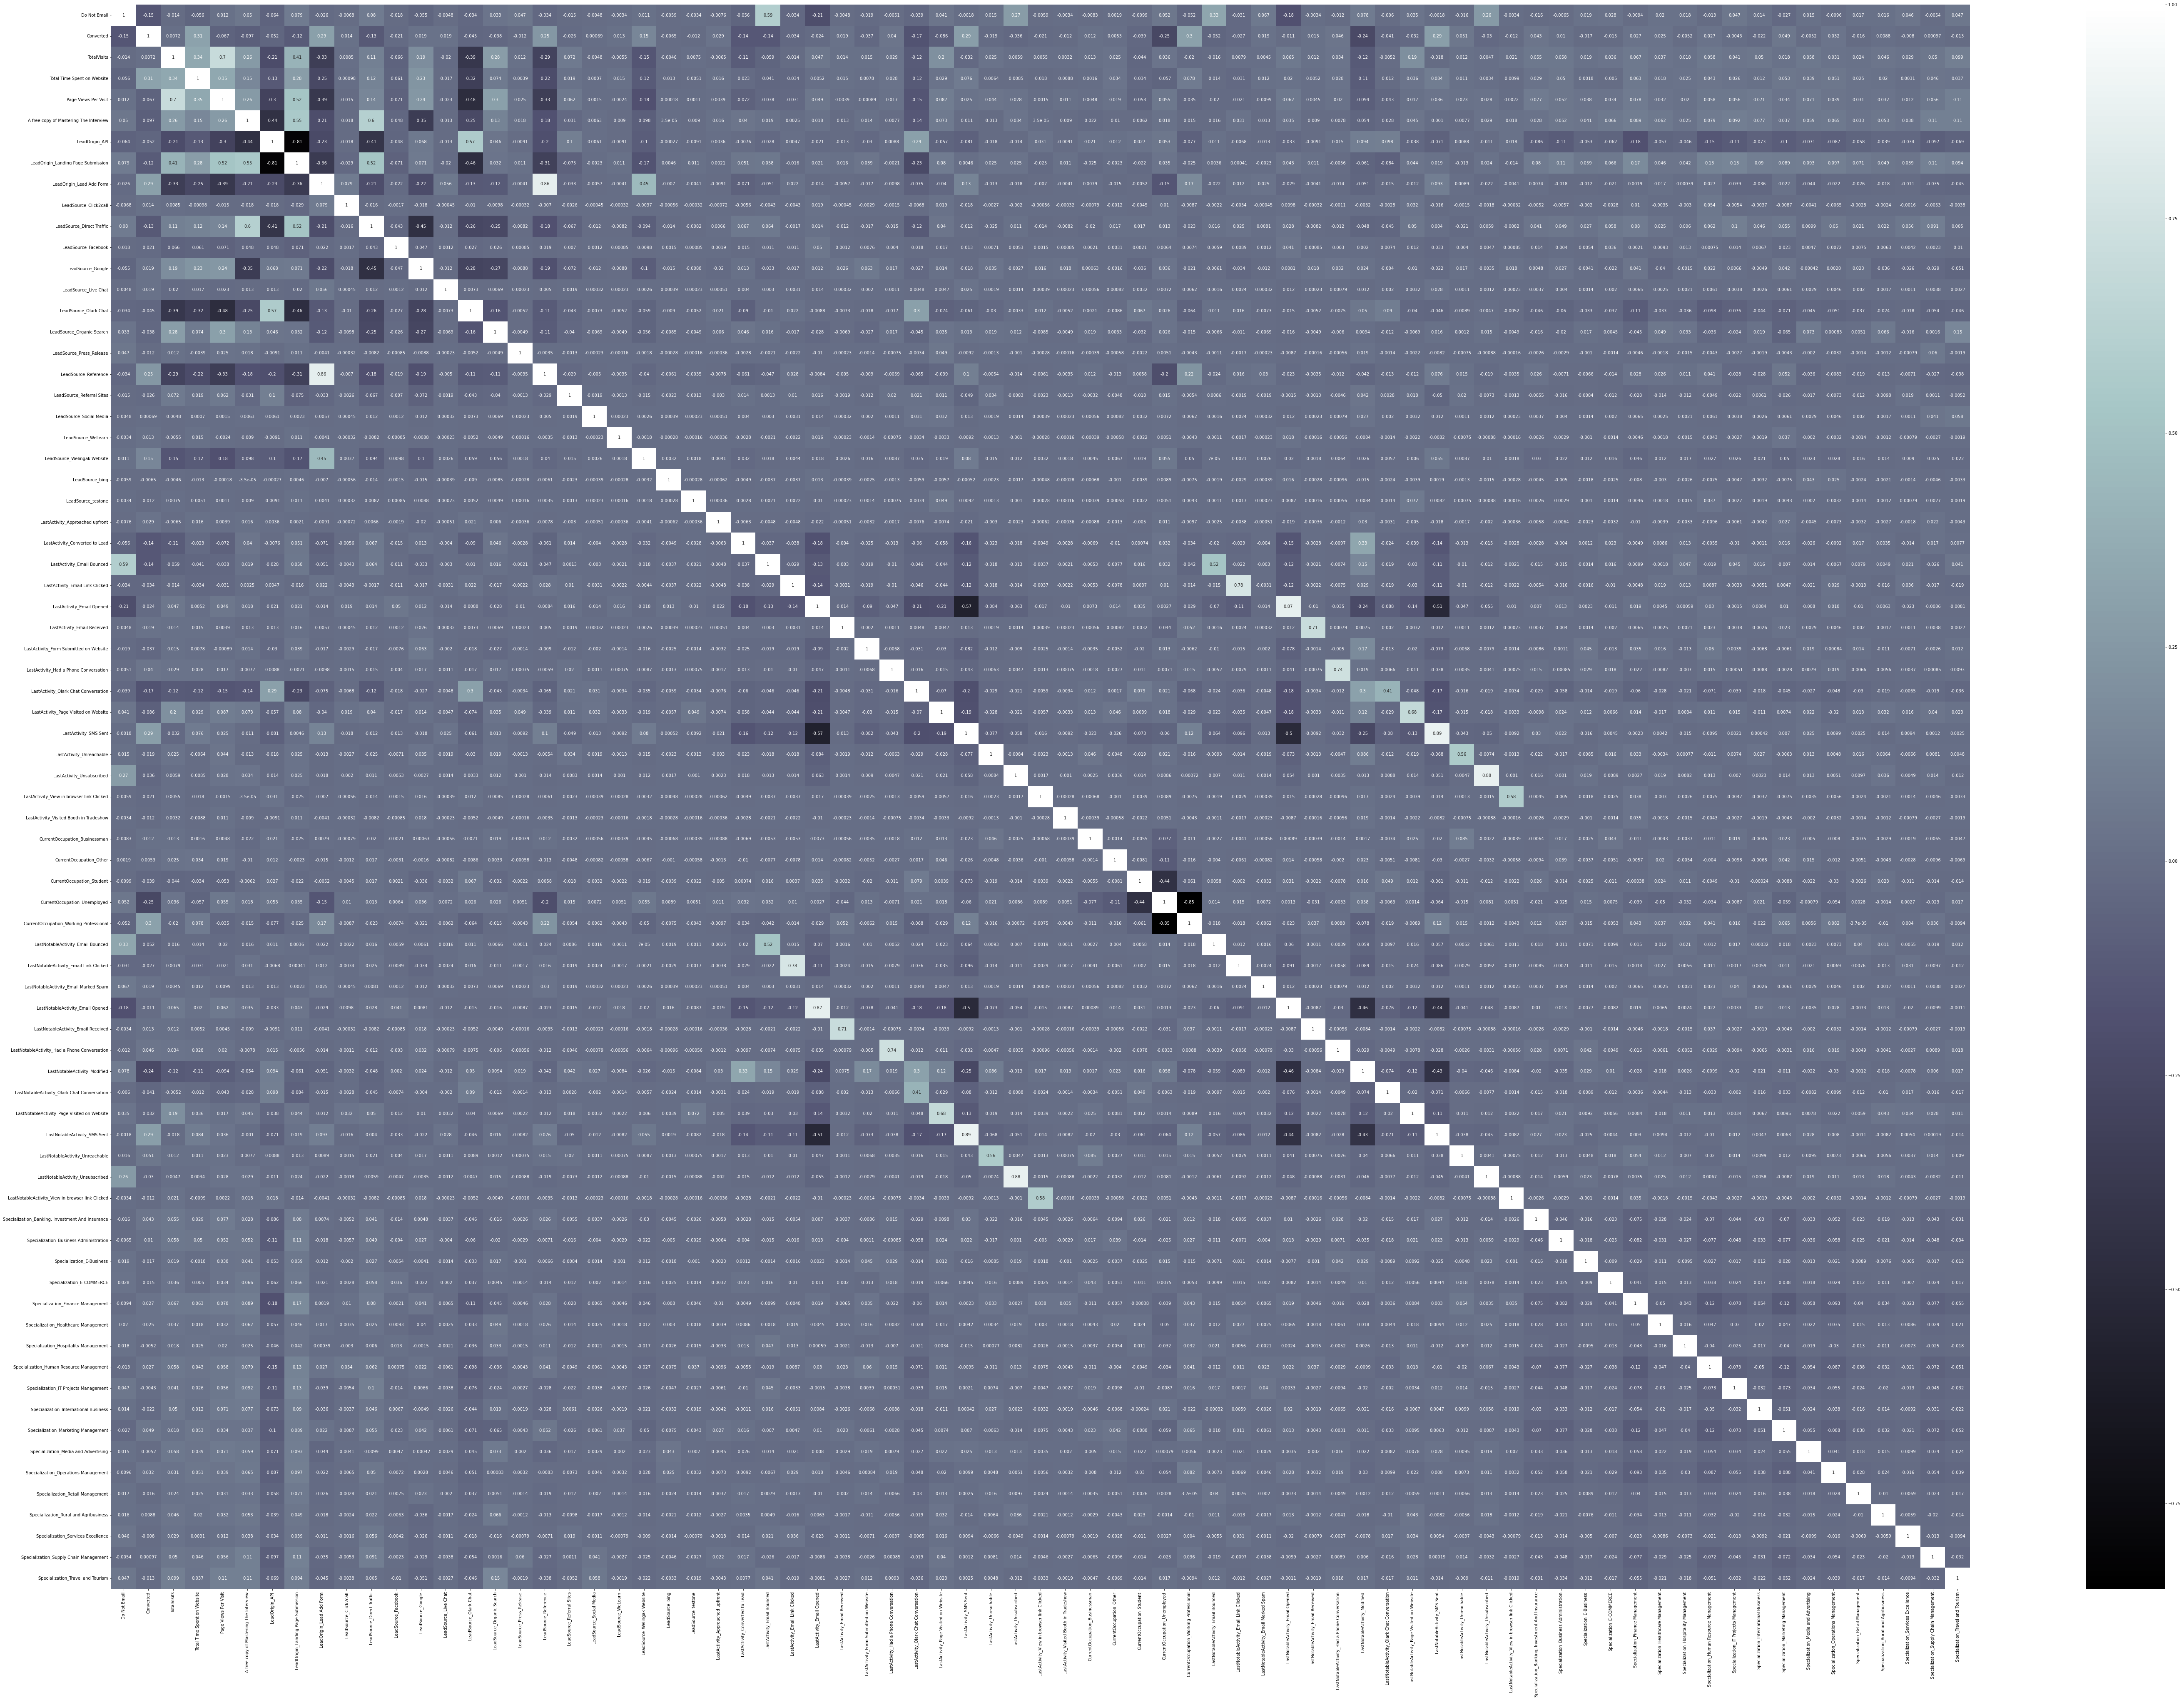

In [59]:
# Let's see the correlation matrix, Using heatmap for correlation
plt.figure(figsize = (100,70)) 
sns.heatmap(lead.corr(), cmap="bone",annot = True)
plt.show()

In [60]:
##Feature Selection Using RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [61]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             
rfe = rfe.fit(X_train, Y_train)

In [63]:
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False,  True,  True,  True, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('A free copy of Mastering The Interview', False, 48),
 ('LeadOrigin_API', False, 4),
 ('LeadOrigin_Landing Page Submission', False, 3),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Click2call', False, 53),
 ('LeadSource_Direct Traffic', False, 14),
 ('LeadSource_Facebook', False, 13),
 ('LeadSource_Google', False, 17),
 ('LeadSource_Live Chat', False, 51),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 15),
 ('LeadSource_Press_Release', False, 56),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 16),
 ('LeadSource_Social Media', False, 39),
 ('LeadSource_WeLearn', False, 43),
 ('LeadSource_Welingak Website', True, 1),
 ('LeadSource_bing', False, 52),
 ('LeadSource_testone', False, 44),
 ('LastActivity_Approached upfront', False, 2),
 ('LastActivity_Converted to Lead', False, 8),
 ('LastAct

In [65]:
# Attributes selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Reference', 'LeadSource_Welingak Website',
       'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [66]:
# Attributes rejected by RFE
X_train.columns[~rfe.support_]

Index(['Page Views Per Visit', 'A free copy of Mastering The Interview',
       'LeadOrigin_API', 'LeadOrigin_Landing Page Submission',
       'LeadSource_Click2call', 'LeadSource_Direct Traffic',
       'LeadSource_Facebook', 'LeadSource_Google', 'LeadSource_Live Chat',
       'LeadSource_Organic Search', 'LeadSource_Press_Release',
       'LeadSource_Referral Sites', 'LeadSource_Social Media',
       'LeadSource_WeLearn', 'LeadSource_bing', 'LeadSource_testone',
       'LastActivity_Approached upfront', 'LastActivity_Converted to Lead',
       'LastActivity_Email Bounced', 'LastActivity_Email Link Clicked',
       'LastActivity_Email Opened', 'LastActivity_Email Received',
       'LastActivity_Form Submitted on Website',
       'LastActivity_Page Visited on Website', 'LastActivity_Unreachable',
       'LastActivity_Unsubscribed',
       'LastActivity_View in browser link Clicked',
       'LastActivity_Visited Booth in Tradeshow',
       'CurrentOccupation_Businessman', 'CurrentOccupa

In [68]:
#Model Building - Assessing the model with StatsModels
#Model 1
# Fit a Logistic Regression Model on X-train after adding a constant and output the summary 

# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm1 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm1.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4342
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1981.9
Date:                Mon, 20 Mar 2023   Deviance:                       3963.8
Time:                        01:32:19   Pearson chi2:                 4.54e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.0502      0.638     -1.646      0.100      -2.301       0.200
Do Not Email                                    -1.5308      0.199     -7.698      0.000      -1.921      -1.141
TotalVisits                                      1.4701      0.280      5.255      0.000       0.922       2.018
Total Time Spent on Website                      4.5649      0.191     23.862      0.000       4.190       4.940
LeadOrigin_Lead Add Form                         2.5163      1.223      2.057      0.040       0.119       4.914
LeadSource_Olark Chat                            1.9150      0.138     13.879      0.000       1.645       2.185
LeadSource_Reference                             1.7404      1.244      1.399      0.162      -0.698       4.179
LeadSource_Welingak Website                      3.3003      1.420      2.324      0.020       0.517       6.084
LastActivity_Had a Phone Conversation            2.7431      1.532      1.790      0.073      -0.260       5.746
LastActivity_Olark Chat Conversation            -1.0858      0.185     -5.862      0.000      -1.449      -0.723
LastActivity_SMS Sent                            1.2094      0.086     14.113      0.000       1.041       1.377
CurrentOccupation_Student                       -1.6427      0.667     -2.461      0.014      -2.951      -0.335
CurrentOccupation_Unemployed                    -1.4552      0.631     -2.305      0.021      -2.693      -0.218
CurrentOccupation_Working Professional           1.0059      0.657      1.532      0.125      -0.281       2.293
LastNotableActivity_Had a Phone Conversation    20.0681   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
LastNotableActivity_Unreachable                  2.7844      0.805      3.459      0.001       1.207       4.362
================================================================================================================
"""

In [70]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,LeadOrigin_Lead Add Form,67.02
5,LeadSource_Reference,53.88
6,LeadSource_Welingak Website,14.63
11,CurrentOccupation_Unemployed,5.34
1,TotalVisits,3.34
7,LastActivity_Had a Phone Conversation,3.26
13,LastNotableActivity_Had a Phone Conversation,3.25
2,Total Time Spent on Website,2.45
12,CurrentOccupation_Working Professional,1.81
4,LeadSource_Olark Chat,1.76


In [71]:
# dropping the 'LeadSource_Reference' because it's VIF value is higher than 5 and P-value is also greater than 0.05
col = col.drop('LeadSource_Reference',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [72]:
#Model 2
# Adding constant
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm2.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4343
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1982.7
Date:                Mon, 20 Mar 2023   Deviance:                       3965.3
Time:                        01:33:58   Pearson chi2:                 4.55e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -1.0476      0.638     -1.642      0.101      -2.298       0.203
Do Not Email                                    -1.5277      0.199     -7.694      0.000      -1.917      -1.138
TotalVisits                                      1.4661      0.280      5.239      0.000       0.918       2.015
Total Time Spent on Website                      4.5621      0.191     23.847      0.000       4.187       4.937
LeadOrigin_Lead Add Form                         4.2142      0.252     16.753      0.000       3.721       4.707
LeadSource_Olark Chat                            1.9120      0.138     13.850      0.000       1.641       2.183
LeadSource_Welingak Website                      1.5998      0.759      2.108      0.035       0.112       3.087
LastActivity_Had a Phone Conversation            2.7407      1.531      1.790      0.074      -0.261       5.742
LastActivity_Olark Chat Conversation            -1.0850      0.185     -5.859      0.000      -1.448      -0.722
LastActivity_SMS Sent                            1.2096      0.086     14.119      0.000       1.042       1.377
CurrentOccupation_Student                       -1.6404      0.667     -2.459      0.014      -2.948      -0.333
CurrentOccupation_Unemployed                    -1.4561      0.631     -2.307      0.021      -2.693      -0.219
CurrentOccupation_Working Professional           1.0061      0.656      1.533      0.125      -0.280       2.293
LastNotableActivity_Had a Phone Conversation    20.0712   1.25e+04      0.002      0.999   -2.46e+04    2.46e+04
LastNotableActivity_Unreachable                  2.7845      0.805      3.459      0.001       1.207       4.362
================================================================================================================
"""

In [73]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CurrentOccupation_Unemployed,5.33
1,TotalVisits,3.33
6,LastActivity_Had a Phone Conversation,3.26
12,LastNotableActivity_Had a Phone Conversation,3.25
2,Total Time Spent on Website,2.44
11,CurrentOccupation_Working Professional,1.80
3,LeadOrigin_Lead Add Form,1.77
4,LeadSource_Olark Chat,1.75
8,LastActivity_SMS Sent,1.66
5,LeadSource_Welingak Website,1.28


In [74]:
# dropping the 'LastNotableActivity_Had a Phone Conversation' because of it's huge P-value
col = col.drop('LastNotableActivity_Had a Phone Conversation',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Unemployed',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [76]:
#Model 3



X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm3.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4344
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1983.3
Date:                Mon, 20 Mar 2023   Deviance:                       3966.6
Time:                        01:39:44   Pearson chi2:                 4.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.0492      0.638     -1.645      0.100      -2.300       0.201
Do Not Email                              -1.5369      0.199     -7.734      0.000      -1.926      -1.147
TotalVisits                                1.4705      0.280      5.255      0.000       0.922       2.019
Total Time Spent on Website                4.5628      0.191     23.850      0.000       4.188       4.938
LeadOrigin_Lead Add Form                   4.2161      0.252     16.758      0.000       3.723       4.709
LeadSource_Olark Chat                      1.9132      0.138     13.857      0.000       1.643       2.184
LeadSource_Welingak Website                1.6010      0.759      2.109      0.035       0.113       3.088
LastActivity_Had a Phone Conversation      3.7417      1.187      3.152      0.002       1.415       6.068
LastActivity_Olark Chat Conversation      -1.0852      0.185     -5.859      0.000      -1.448      -0.722
LastActivity_SMS Sent                      1.2099      0.086     14.121      0.000       1.042       1.378
CurrentOccupation_Student                 -1.6401      0.667     -2.458      0.014      -2.948      -0.332
CurrentOccupation_Unemployed              -1.4555      0.631     -2.306      0.021      -2.693      -0.218
CurrentOccupation_Working Professional     1.0068      0.656      1.534      0.125      -0.280       2.293
LastNotableActivity_Unreachable            2.7844      0.805      3.459      0.001       1.207       4.362
==========================================================================================================
"""

In [77]:
# Checking the VIF for the new model-
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,CurrentOccupation_Unemployed,5.33
1,TotalVisits,3.33
2,Total Time Spent on Website,2.44
11,CurrentOccupation_Working Professional,1.80
3,LeadOrigin_Lead Add Form,1.77
4,LeadSource_Olark Chat,1.75
8,LastActivity_SMS Sent,1.66
5,LeadSource_Welingak Website,1.28
7,LastActivity_Olark Chat Conversation,1.23
9,CurrentOccupation_Student,1.15


In [78]:
col = col.drop('CurrentOccupation_Unemployed',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Student', 'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [79]:
#Model 4
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm4 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm4.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4345
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.3
Date:                Mon, 20 Mar 2023   Deviance:                       3972.7
Time:                        01:40:42   Pearson chi2:                 4.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4985      0.111    -22.534      0.000      -2.716      -2.281
Do Not Email                              -1.5431      0.199     -7.769      0.000      -1.932      -1.154
TotalVisits                                1.4859      0.280      5.310      0.000       0.937       2.034
Total Time Spent on Website                4.5721      0.191     23.910      0.000       4.197       4.947
LeadOrigin_Lead Add Form                   4.2192      0.251     16.778      0.000       3.726       4.712
LeadSource_Olark Chat                      1.9116      0.138     13.851      0.000       1.641       2.182
LeadSource_Welingak Website                1.5974      0.759      2.105      0.035       0.110       3.085
LastActivity_Had a Phone Conversation      3.7337      1.188      3.143      0.002       1.405       6.062
LastActivity_Olark Chat Conversation      -1.0925      0.185     -5.900      0.000      -1.455      -0.730
LastActivity_SMS Sent                      1.2002      0.086     14.029      0.000       1.033       1.368
CurrentOccupation_Student                 -0.1927      0.224     -0.860      0.390      -0.632       0.247
CurrentOccupation_Working Professional     2.4547      0.190     12.945      0.000       2.083       2.826
LastNotableActivity_Unreachable            2.7734      0.805      3.445      0.001       1.196       4.351
==========================================================================================================
"""

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.05
1,TotalVisits,1.99
8,LastActivity_SMS Sent,1.53
3,LeadOrigin_Lead Add Form,1.46
5,LeadSource_Welingak Website,1.28
4,LeadSource_Olark Chat,1.24
10,CurrentOccupation_Working Professional,1.22
7,LastActivity_Olark Chat Conversation,1.20
0,Do Not Email,1.04
9,CurrentOccupation_Student,1.04


In [81]:
col = col.drop('CurrentOccupation_Student',1)
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'LeadOrigin_Lead Add Form', 'LeadSource_Olark Chat',
       'LeadSource_Welingak Website', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Unreachable'],
      dtype='object')

In [83]:
#Model 5
X_train_sm = sm.add_constant(X_train[col])

# Running the model
logm5 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())

# Fit a line
res = logm5.fit()

# Checking the model summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4358
Model:                            GLM   Df Residuals:                     4346
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1986.7
Date:                Mon, 20 Mar 2023   Deviance:                       3973.4
Time:                        01:42:04   Pearson chi2:                 4.56e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.5063      0.111    -22.669      0.000      -2.723      -2.290
Do Not Email                              -1.5384      0.199     -7.749      0.000      -1.927      -1.149
TotalVisits                                1.4897      0.280      5.322      0.000       0.941       2.038
Total Time Spent on Website                4.5709      0.191     23.909      0.000       4.196       4.946
LeadOrigin_Lead Add Form                   4.2107      0.251     16.768      0.000       3.719       4.703
LeadSource_Olark Chat                      1.9077      0.138     13.833      0.000       1.637       2.178
LeadSource_Welingak Website                1.6097      0.759      2.121      0.034       0.123       3.097
LastActivity_Had a Phone Conversation      3.7392      1.187      3.149      0.002       1.412       6.067
LastActivity_Olark Chat Conversation      -1.0973      0.185     -5.927      0.000      -1.460      -0.734
LastActivity_SMS Sent                      1.2052      0.085     14.116      0.000       1.038       1.372
CurrentOccupation_Working Professional     2.4614      0.189     12.989      0.000       2.090       2.833
LastNotableActivity_Unreachable            2.7808      0.805      3.455      0.001       1.203       4.359
==========================================================================================================
"""

In [84]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Total Time Spent on Website,2.05
1,TotalVisits,1.98
8,LastActivity_SMS Sent,1.53
3,LeadOrigin_Lead Add Form,1.45
5,LeadSource_Welingak Website,1.28
4,LeadSource_Olark Chat,1.23
9,CurrentOccupation_Working Professional,1.22
7,LastActivity_Olark Chat Conversation,1.20
0,Do Not Email,1.04
6,LastActivity_Had a Phone Conversation,1.01


In [85]:
#Model prediction
#trainset
Y_train_pred = res.predict(X_train_sm).values.reshape(-1)


In [86]:
Y_train_pred[:10]

array([0.49376061, 0.99537157, 0.98922004, 0.77015502, 0.18592982,
       0.58854338, 0.18444707, 0.5054769 , 0.35465899, 0.41403957])

In [87]:
#Creating a dataframe with the actual converted flag and the predicted probabilities
Y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':Y_train_pred})
Y_train_pred_final['LeadId'] = Y_train.index
Y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,1,0.493761,4305
1,1,0.995372,2675
2,1,0.989220,7045
3,1,0.770155,2027
4,0,0.185930,1410


In [88]:
Y_train_pred_final['predicted'] = Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,1,0.493761,4305,0
1,1,0.995372,2675,1
2,1,0.989220,7045,1
3,1,0.770155,2027,1
4,0,0.185930,1410,0


In [96]:
#Evaluating the model
#Confusion Matrix
confusion = confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.predicted )
print(confusion)

[[1863  383]
 [ 524 1588]]


In [97]:
#checking the accuracy 
print(accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.predicted))

0.791877007801744


In [98]:
## Let's Check the Metrics - Sensitivity, Specificity, False Positive Rate, Postitive Predictive Value and Negative Predictive Value
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
print('sensitivity =',TN / float(TN+FP))
print('specificity =',TN / float(TN+FP))
print('false postive rate =',FP/ float(TN+FP))
print('positive predictive =',TP / float(TP+FP))
print('Negative predictive =',TN / float(TN+ FN))

sensitivity = 0.8294746215494212
specificity = 0.8294746215494212
false postive rate = 0.1705253784505788
positive predictive = 0.8056823947234906
Negative predictive = 0.7804775869291999


In [101]:
#ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( Y_train_pred_final.Converted, 
                                         Y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

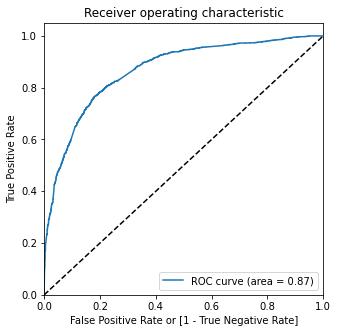

In [103]:
draw_roc(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

In [104]:
#Finding Optimal Cutoff Point - Sensitivity and Specificity
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_final[i]= Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.484626  1.000000  0.000000
0.1   0.1  0.546581  0.991004  0.128673
0.2   0.2  0.726251  0.938920  0.526269
0.3   0.3  0.762047  0.901989  0.630454
0.4   0.4  0.788894  0.808712  0.770258
0.5   0.5  0.791877  0.751894  0.829475
0.6   0.6  0.779945  0.684659  0.869546
0.7   0.7  0.746673  0.565341  0.917186
0.8   0.8  0.715925  0.462595  0.954141
0.9   0.9  0.648463  0.292614  0.983081


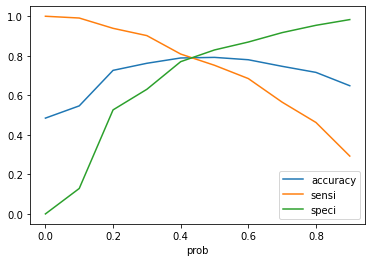

In [107]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

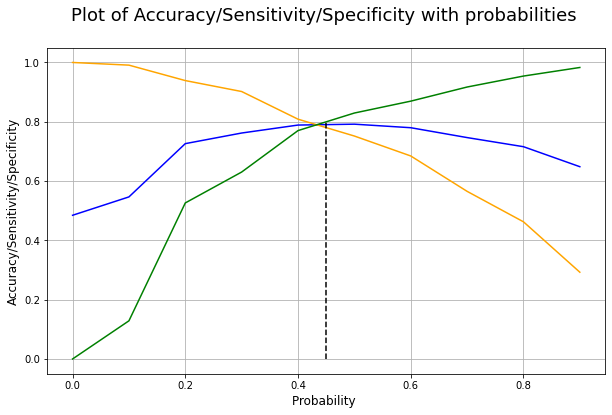

In [108]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize = (10,6))

sns.lineplot(cutoff_df.prob , cutoff_df.accuracy , color = "blue")
sns.lineplot(cutoff_df.prob , cutoff_df.sensi , color = "orange")
sns.lineplot(cutoff_df.prob , cutoff_df.speci , color = "green")
plt.plot([0.45, 0.45], [0, 0.8], 'k--')


plt.title("Plot of Accuracy/Sensitivity/Specificity with probabilities \n", fontdict={'fontsize': 18, 'fontweight' : 18})


plt.xlabel("Probability ", fontdict={'fontsize': 12, 'fontweight' : 18})
plt.ylabel("Accuracy/Sensitivity/Specificity", fontdict={'fontsize': 12, 'fontweight' : 18})

plt.grid()
plt.show()


In [109]:
Y_train_pred_final['final_Predicted']=Y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.43 else 0)
Y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0,1
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0,0


In [110]:
Y_train_pred_final['lead_score_board'] = Y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
Y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,lead_score_board
0,1,0.493761,4305,0,1,1,1,1,1,0,0,0,0,0,1,49
1,1,0.995372,2675,1,1,1,1,1,1,1,1,1,1,1,1,100
2,1,0.989220,7045,1,1,1,1,1,1,1,1,1,1,1,1,99
3,1,0.770155,2027,1,1,1,1,1,1,1,1,1,0,0,1,77
4,0,0.185930,1410,0,1,1,0,0,0,0,0,0,0,0,0,19
5,0,0.588543,3764,1,1,1,1,1,1,1,0,0,0,0,1,59
6,0,0.184447,6720,0,1,1,0,0,0,0,0,0,0,0,0,18
7,1,0.505477,859,1,1,1,1,1,1,1,0,0,0,0,1,51
8,1,0.354659,4774,0,1,1,1,1,0,0,0,0,0,0,0,35
9,0,0.414040,3342,0,1,1,1,1,1,0,0,0,0,0,0,41


In [111]:
# Checking if 75% cases are correctly predicted based on the converted column.
# Get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = Y_train_pred_final.loc[Y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1670
0     442
Name: final_Predicted, dtype: int64

In [112]:
1670/float(1670+442)

0.790719696969697

In [113]:
#Let's check  accuracy
print(metrics.accuracy_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted))

0.7907296925195043


In [114]:
confusion2 = metrics.confusion_matrix(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted )
confusion2

array([[1776,  470],
       [ 442, 1670]])

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
print('sensitivity =',TP / float(TP+FN))
print('specificity =',TN / float(TN+FP))
print('false postive rate =',FP/ float(TN+FP))
print('positive predictive =',TP / float(TP+FP))
print('Negative predictive =',TN / float(TN+ FN))

sensitivity = 0.790719696969697
specificity = 0.7907390917186109
false postive rate = 0.20926090828138913
positive predictive = 0.780373831775701
Negative predictive = 0.8007213706041478


In [119]:
#Precision & Recall
print('precision =',TP/ (TP + FP))
print('Recall = ',TP/ (TP + FN))

precision = 0.780373831775701
Recall =  0.790719696969697


In [120]:
# Using sklearn utilities for the same

precision_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.780373831775701

In [121]:
recall_score(Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted)

0.790719696969697

In [122]:
#tradeoff
Y_train_pred_final.Converted, Y_train_pred_final.final_Predicted

(0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4353    0
 4354    0
 4355    1
 4356    1
 4357    1
 Name: Converted, Length: 4358, dtype: int64,
 0       1
 1       1
 2       1
 3       1
 4       0
        ..
 4353    0
 4354    0
 4355    1
 4356    0
 4357    1
 Name: final_Predicted, Length: 4358, dtype: int64)

In [124]:
p, r, thresholds = precision_recall_curve(Y_train_pred_final.Converted, Y_train_pred_final.Converted_Prob)

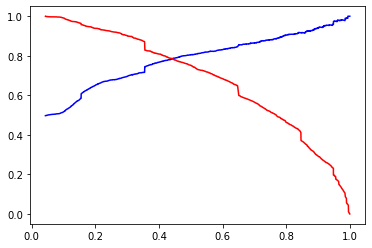

In [125]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [126]:
print('The cut-off value is approximately 0.43')

The cut-off value is approximately 0.43


In [127]:
#### Making predictions on the test set

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [128]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Unreachable
5067,0,0.294118,0.075264,0,0,0,0,0,0,0,0
5655,0,0.058824,0.218310,0,0,0,0,0,0,0,0
8114,0,0.294118,0.615757,0,0,0,0,0,0,0,0
1931,0,0.000000,0.000000,0,1,0,0,0,1,0,0
3325,0,0.000000,0.000000,1,0,0,0,0,1,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
X_test_sm

,const,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Had a Phone Conversation,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_Working Professional,LastNotableActivity_Unreachable
5067,1.0,0,0.294118,0.075264,0,0,0,0,0,0,0,0
5655,1.0,0,0.058824,0.218310,0,0,0,0,0,0,0,0
8114,1.0,0,0.294118,0.615757,0,0,0,0,0,0,0,0
1931,1.0,0,0.000000,0.000000,0,1,0,0,0,1,0,0
3325,1.0,0,0.000000,0.000000,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7805,1.0,0,0.176471,0.447623,0,0,0,0,0,1,0,0
791,1.0,0,0.470588,0.220511,0,0,0,0,0,0,0,0
2933,1.0,0,0.000000,0.000000,1,0,0,0,0,0,1,0
2402,1.0,0,0.352941,0.381162,0,0,0,0,0,0,0,0


In [131]:
Y_test_pred = res.predict(X_test_sm)
Y_test_pred[:10]

5067    0.151340
5655    0.194534
8114    0.678394
1931    0.647149
3325    0.948316
6755    0.931078
6837    0.145463
930     0.231604
6636    0.792473
1788    0.870560
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
Y_test_pred = pd.DataFrame(Y_test_pred)
Y_test_pred.head()

,0
5067,0.151340
5655,0.194534
8114,0.678394
1931,0.647149
3325,0.948316


In [134]:
# Converting y_test to dataframe
Y_test_dataframe = pd.DataFrame(Y_test)

In [135]:
Y_test_dataframe['Lead ID'] = Y_test_dataframe.index

In [136]:
# Removing index for both dataframes to append them side by side 
Y_test_pred.reset_index(drop=True, inplace=True)
Y_test_dataframe.reset_index(drop=True, inplace=True)

In [137]:
Y_pred_final = pd.concat([Y_test_dataframe, Y_test_pred],axis=1)

In [138]:
Y_pred_final.head()

,Converted,Lead ID,0
0,0,5067,0.151340
1,1,5655,0.194534
2,0,8114,0.678394
3,1,1931,0.647149
4,1,3325,0.948316


In [139]:
Y_pred_final= Y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [140]:
Y_pred_final['Lead_Score_Board'] = Y_pred_final.Converted_Prob.map(lambda x: round(x*100))
Y_pred_final.head()

,Converted,Lead ID,Converted_Prob,Lead_Score_Board
0,0,5067,0.151340,15
1,1,5655,0.194534,19
2,0,8114,0.678394,68
3,1,1931,0.647149,65
4,1,3325,0.948316,95


In [141]:
Y_pred_final = Y_pred_final.reindex(['Lead ID','Converted','Converted_Prob', 'Lead_Score_Board'], axis=1)

In [142]:
Y_pred_final.head()

,Lead ID,Converted,Converted_Prob,Lead_Score_Board
0,5067,0,0.151340,15
1,5655,1,0.194534,19
2,8114,0,0.678394,68
3,1931,1,0.647149,65
4,3325,1,0.948316,95


In [143]:
Y_pred_final['final_predicted'] = Y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.43 else 0)

In [144]:
Y_pred_final.head()

,Lead ID,Converted,Converted_Prob,Lead_Score_Board,final_predicted
0,5067,0,0.151340,15,0
1,5655,1,0.194534,19,0
2,8114,0,0.678394,68,1
3,1931,1,0.647149,65,1
4,3325,1,0.948316,95,1


In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted)

0.784796573875803

In [146]:
confusion2 = metrics.confusion_matrix(Y_pred_final.Converted, Y_pred_final.final_predicted)
confusion2

array([[778, 209],
       [193, 688]])

In [147]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [149]:
print('accuracy = ', metrics.accuracy_score(Y_pred_final.Converted, Y_pred_final.final_predicted))
print('sensitivity =',TP / float(TP+FN))
print('specificity =',TN / float(TN+FP))

accuracy =  0.784796573875803
sensitivity = 0.7809307604994324
specificity = 0.7882472137791287


In [151]:
# precision
print('Precision = ',precision_score(Y_pred_final.Converted, Y_pred_final.final_predicted))

# recall
print('Recall =',recall_score(Y_pred_final.Converted, Y_pred_final.final_predicted))

Precision =  0.7670011148272018
Recall = 0.7809307604994324


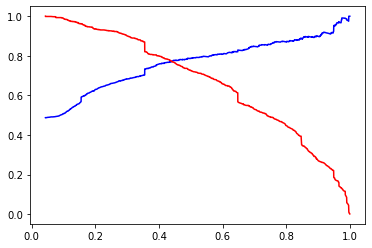

In [153]:
p, r, thresholds = precision_recall_curve(Y_pred_final.Converted, Y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Insights:

Comparing the values obtained for Train & Test data set:

#### Train Data:

Accuracy = 0.79072

Sensitivity = 0.79071

Specificity = 0.79073

#### Test Data:

Accuracy = 0.785

sensitivity = 0.799

Specificity = 0.773

##### THE END